In [1]:
#Che Wang PCA HW ML

import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
%matplotlib inline 
#notebook magic
######### Read the data ##########


In [2]:

infile = open('faces.csv','r')
img_data = infile.read().strip().split('\n')
m = len(img_data)
for i in range(m):
    newEntry = img_data[i].strip().split(',')
    img_data[i] = [int(num) for num in newEntry]

faces = np.reshape(img_data,(400,4096))
#faces = np.reshape([map(int,a.strip().split(',')) for a in img_data],(400,4096))

print(faces.shape)
#now faces is the vector "A", which is 400*4096


(400, 4096)


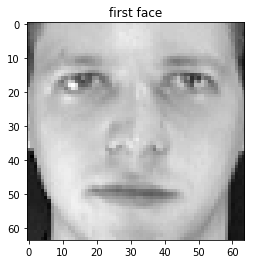

In [3]:

######### Global Variable ##########

image_count = 0

######### Function that normalizes a vector x (i.e. |x|=1 ) #########

# > numpy.linalg.norm(x, ord=None, axis=None, keepdims=False) 
#   This function is able to return one of eight different matrix norms, 
#   or one of an infinite number of vector norms (described below), 
#   depending on the value of the ord parameter.

def normalize(U):
	return U / LA.norm(U) 

######### Display first face #########

# Useful functions:
# > numpy.reshape(a, newshape, order='C')
#   Gives a new shape to an array without changing its data.
# > matplotlib.pyplot.figure()
# 	Creates a new figure.
# > matplotlib.pyplot.title()
#	Set a title of the current axes.
# > matplotlib.pyplot.imshow()
#	Display an image on the axes.
#	Note: You need a matplotlib.pyplot.show() at the end to display all the figures.

def show_face(image_count,face,faceName): #the function used to show a face image
    plt.figure(image_count)
    plt.title(faceName)
    plt.imshow(face,cmap=plt.cm.gray)

image_count+=1
face_to_show = np.reshape(faces[0],(64,64),order='F')
show_face(image_count,face_to_show,"first face")
#show the first face here


random face index: 138


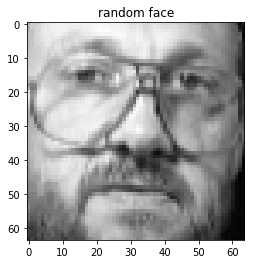

In [4]:
########## 1. display a random face ###########

# Useful functions:
# > numpy.random.choice(a, size=None, replace=True, p=None)
#   Generates a random sample from a given 1-D array
# > numpy.ndarray.shape()
#   Tuple of array dimensions.

#### Your Code Here ####
random_index = np.random.randint(m)
face_to_show = np.reshape(faces[random_index],(64,64),order='F')
print("random face index: "+str(random_index))
image_count+=1
show_face(image_count,face_to_show,"random face")


(4096,)
(64, 64)


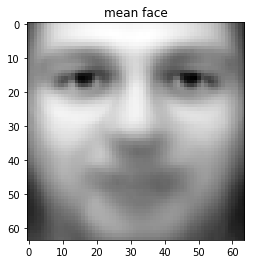

In [5]:
########## 2. compute and display the mean face ###########

# Useful functions:
# > numpy.mean(a, axis='None', ...)
#   Compute the arithmetic mean along the specified axis.
#   Returns the average of the array elements. The average is taken over 
#   the flattened array by default, otherwise over the specified axis. 
#   float64 intermediate and return values are used for integer inputs.

#### Your Code Here ####
mean_face = np.mean(faces,0)
print(mean_face.shape)
mean_face_img = np.reshape(mean_face,(64,64),order="F")
print(mean_face_img.shape)
image_count+=1
show_face(image_count,mean_face_img,"mean face")

#image_count+=1
#face_to_show = np.reshape(faces[0]-mean_face,(64,64),order="F")
#show_face(image_count,face_to_show,"first minus mean face")


In [6]:

######### 3. substract the mean from the face images and get the centralized data matrix A ###########

# Useful functions:
# > numpy.repeat(a, repeats, axis=None)
#   Repeat elements of an array.

#### Your Code Here ####

#normalized_faces = faces - 
faces = faces.astype(float)
A = faces - mean_face
print(A.shape)
#now mean is subtracted
#now we have matrix A

(400, 4096)


In [7]:

######### 4. calculate the eigenvalues and eigenvectors of the covariance matrix #####################

# Useful functions:
# > numpy.matrix()
#   Returns a matrix from an array-like object, or from a string of data. 
#   A matrix is a specialized 2-D array that retains its 2-D nature through operations. 
#   It has certain special operators, such as * (matrix multiplication) and ** (matrix power).

# > numpy.matrix.transpose(*axes)
#   Returns a view of the array with axes transposed.

# > numpy.linalg.eig(a)[source]
#   Compute the eigenvalues and right eigenvectors of a square array.
#   The eigenvalues, each repeated according to its multiplicity. 
#   The eigenvalues are not necessarily ordered. 

#### Your Code Here ####

#L = AA^T
#first get eigen vectors of L
A = np.matrix(A)
L = np.matmul(A,A.transpose())
print(L.shape)

eigenL = np.linalg.eig(L)
eigenValueL = eigenL[0]
eigenVectorL = eigenL[1] #400*400

sortIndex = np.argsort(eigenValueL)
indexesToUse = np.flip(sortIndex[-50:],0) 
print(indexesToUse)

Z = np.matmul(A.transpose(), eigenVectorL)
print("all z dimension: ",Z.shape)
#we should have 400 small z here right...

#Z = normalize(Z)###################################
Z = Z.transpose()
for i in range(400):
    Z[i] = normalize(Z[i])#that's the correct way of normalize z vectors
    
Z = Z.transpose()
print("the z after all the stuff", Z.shape)


#normalize each z to let magnitude of z be 1
#Z = normalize(Z)

UFull = Z.transpose()
U = Z.transpose()[indexesToUse] #U is the 50 eigen vectors to use


print(U.shape)
#now we have U
#we can use U to transform a face image.

(400, 400)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
all z dimension:  (4096, 400)
the z after all the stuff (4096, 400)
(50, 4096)


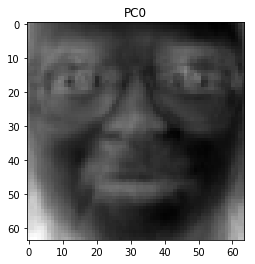

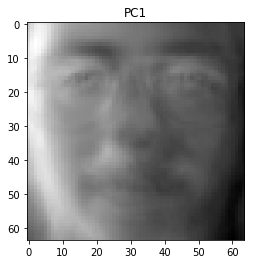

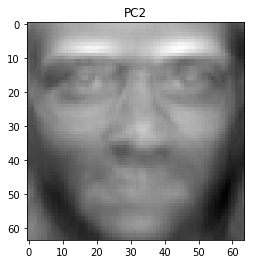

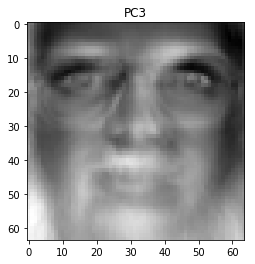

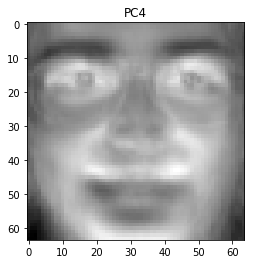

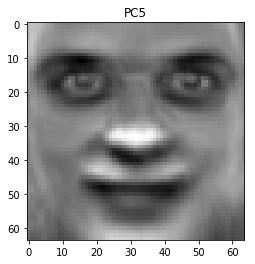

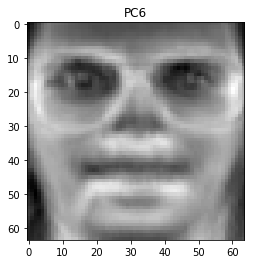

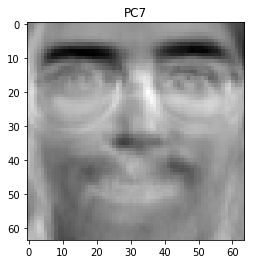

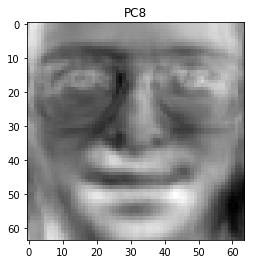

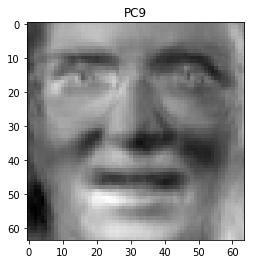

In [8]:
########## 5. Display the first 10 principal components ##################
#### Your Code Here ####
first_ten_PC = U[0:10]
max_value = np.max(U)
scale = 255/max_value

scaled_first_ten_PC = first_ten_PC * scale

for i in range(10):
    face_to_show = scaled_first_ten_PC[i]
    face_to_show = np.reshape(face_to_show,(64,64),order="F")
    image_count+=1
    show_face(image_count,face_to_show,"PC"+str(i))

35.8660161785
1227.05798535
(4096,)
14


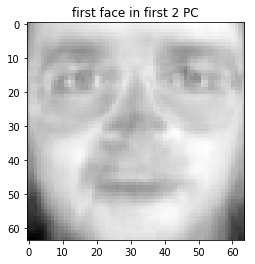

In [9]:
########## 6. Reconstruct the first face using the first two PCs #########

#### Your Code Here ####

U = UFull.transpose() 
U = U[:,:2] #only use the first 2 principal components
first_face = faces[0] #4096,

omega = np.matmul(U.transpose(),faces[0] - mean_face) #length of omega is k

xprime = np.ravel(np.matmul(U,omega.transpose())) 

max_value = np.max(xprime)
scale = 30
scaled_xprime = xprime * scale

print(np.max(xprime))

xprime = scaled_xprime+ mean_face
print(np.max(xprime))
print(xprime.shape)

face_to_show = np.reshape(xprime,(64,64),order="F")
image_count+=1
print(image_count)
show_face(image_count,face_to_show,"first face in first 2 PC")



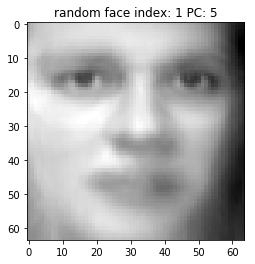

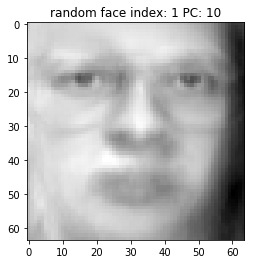

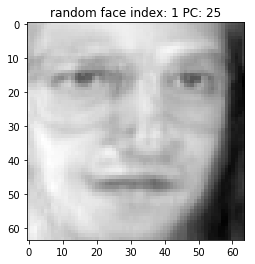

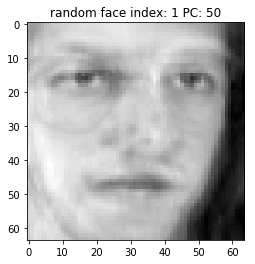

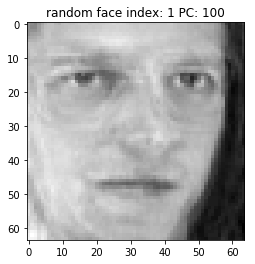

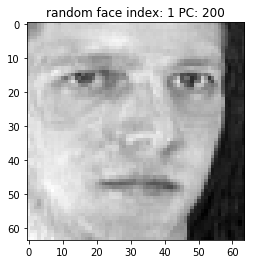

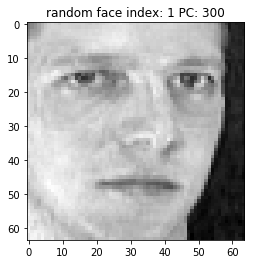

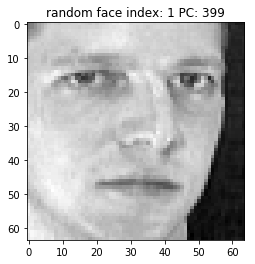

In [14]:

########## 7. Reconstruct random face using the first 5, 10, 25, 50, 100, 200, 300, 399  PCs ###########

#### Your Code Here ####

PCCount = [5, 10, 25, 50, 100, 200, 300, 399]

random_index = np.random.randint(m)
UOriginal = UFull.transpose() 
for i in range(len(PCCount)):
    U = UOriginal[:,:PCCount[i]]
    omega = np.matmul(U.transpose(),faces[random_index] - mean_face) #length of omega is k
    xprime = np.ravel(np.matmul(U,omega.transpose())) 

    max_value = np.max(xprime)

    xprime = xprime+ mean_face

    face_to_show = np.reshape(xprime,(64,64),order="F")
    image_count+=1
    show_face(image_count,face_to_show,"random face index: "+str(random_index)+" PC: "+str(PCCount[i]))



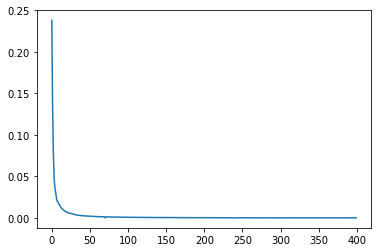

In [11]:


######### 8. Plot proportion of variance of all the PCs ###############

# Useful functions:
# > matplotlib.pyplot.plot(*args, **kwargs)
#   Plot lines and/or markers to the Axes. 
# > matplotlib.pyplot.show(*args, **kw)
#   Display a figure. 
#   When running in ipython with its pylab mode, 
#   display all figures and return to the ipython prompt.

#### Your Code Here ####

x = np.arange(0, 400, 1);
y = eigenValueL/np.sum(eigenValueL)
plt.plot(x, y)
